In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

# Suppress Warnings In Python
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

* загрузка набора данных и цифр
* Carregando datasets e digitos

In [2]:
digits = load_digits()
X, Y = digits.data, digits.target

* просмотр изображения и цели
* Visualizando imagem e target

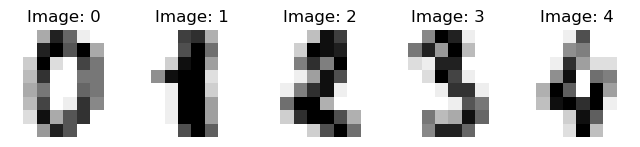

In [3]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(8, 8))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Image: %i" % label)

* Разделение датасета на обучающие и тестовые данные
* Dividir os dados em treinamento e teste

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

* Создание ближайших соседей K-моделей
* Criando um modelo knn

In [5]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

* Значение точности.
* Valor de precisão 

In [6]:
score = knn.score(X_test, Y_test)
print('Score: %f' % score)

Score: 0.983333


* Тестирование k от 1 до 20
* Testando k de 1 a 20 

In [7]:
neighbors = np.arange(1, 21)
train_accurancy = np.empty(len(neighbors))
test_accurancy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accurancy[i] = knn.score(X_train, Y_train)
    test_accurancy[i] = knn.score(X_test, Y_test)

In [8]:
print(test_accurancy)

[0.98333333 0.98333333 0.99166667 0.98333333 0.98888889 0.98333333
 0.98611111 0.98055556 0.98333333 0.975      0.97777778 0.97777778
 0.97777778 0.97222222 0.96944444 0.96944444 0.96388889 0.96666667
 0.96388889 0.96666667]


* Просмотр значения точности теста
* Visualizando valor de precisão de teste

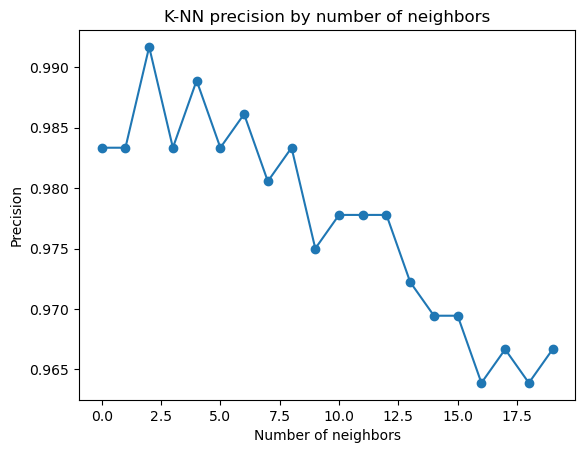

In [9]:
plt.plot(test_accurancy, 'o-')
plt.title('K-NN precision by number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Precision')
plt.show()

* Предварительный просмотр и проверка скорости обучения
* Taxa de aprendizado de visualização e teste

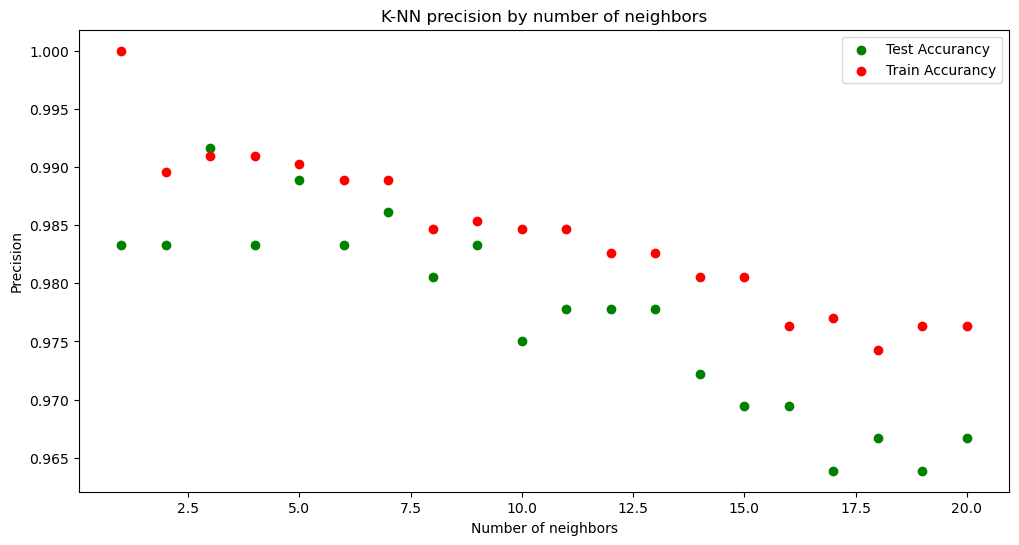

In [10]:
plt.figure(figsize=(12,6))
plt.title('K-NN precision by number of neighbors')
plt.scatter(neighbors, test_accurancy, label='Test Accurancy', color="green")
plt.scatter(neighbors, train_accurancy, label="Train Accurancy", color="red")
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Precision')
plt.show()

In [11]:
y_pred=knn.predict(X_test)

* матрица путаницы
* Matriz de confusão 

In [12]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 44,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 28,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  3,  0, 32]], dtype=int64)

In [13]:
np.bincount(Y_test)

array([43, 39, 46, 35, 36, 30, 27, 27, 40, 37], dtype=int64)